# 3 Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

from bs4 import BeautifulSoup
import requests

import re
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk;
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True);
from sklearn.feature_extraction.text import TfidfVectorizer

pd.options.display.max_colwidth = 200;
pd.options.mode.chained_assignment = None

In [2]:
def ecdf(data):
    """Compute Empirical Cumulative Distribution Function (ECDF) for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# -*- coding: utf-8 -*-
def isEnglish(s):
    """Check if str contains only english alphabets"""
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return 0
    else:
        return 1
#https://stackoverflow.com/questions/27084617/detect-strings-with-non-english-characters-in-python

In [3]:
filepath = "../data/processed/"
df = pd.read_csv(filepath + 'nft_combined.csv')
print("Shape of Data:{}".format(df.shape))

Shape of Data:(32949, 19)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32949 entries, 0 to 32948
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   n_id                  32949 non-null  object 
 1   n_isFirstSale         32949 non-null  bool   
 2   n_lastSalePriceInETH  32949 non-null  float64
 3   n_revenue             32949 non-null  float64
 4   n_tokenIPFSPath       32949 non-null  object 
 5   n_date_minted         32949 non-null  object 
 6   n_rs_ratio            32949 non-null  float64
 7   c_id                  32949 non-null  object 
 8   c_revenue             32949 non-null  float64
 9   c_sales               32949 non-null  float64
 10  c_rs_ratio            32949 non-null  float64
 11  m_name                32949 non-null  object 
 12  m_desc                32949 non-null  object 
 13  m_img                 32949 non-null  object 
 14  n_bid_count           32949 non-null  float64
 15  n_bid_max          

In [5]:
df.head(3)

,n_id,n_isFirstSale,n_lastSalePriceInETH,n_revenue,n_tokenIPFSPath,n_date_minted,n_rs_ratio,c_id,c_revenue,c_sales,c_rs_ratio,m_name,m_desc,m_img,n_bid_count,n_bid_max,n_list_max,n_bid_mean,n_bid_min
0,0x3b3ee1931dc30c1957379fac9aba94d1c48a5405-24437,False,2224.0000,1890.40000,QmNeqUFf3WKcXFEHgxFCrf3t8jrxyCkev6LBtRz78Ygq9u/metadata.json,2021-04-14 22:13:06,0.85,0xf74d1224931afa9cf12d06092c1eb1818d1e255c,1890.400000,2224.0000,0.850000,"Stay Free (Edward Snowden, 2021)","This unique, signed work combines the entirety of a landmark court decision ruling the National Security Agency's mass surveillance violated the law, with the iconic portrait of the whistleblower ...",ipfs://QmTKdyzYbT9FzAs8mB4HGiLDR7o8maRP34J5iNDFZQqndQ/nft.png,31.0,2224.0000,2.0,552.849126,2.0
1,0x3b3ee1931dc30c1957379fac9aba94d1c48a5405-100052,False,49.5002,42.07517,QmaW2ukMCqyMNg5qqoYsusgbNL9KRnFwRKCkBt6u3AiyTN/metadata.json,2021-10-19 04:56:48,0.85,0x4666fd1f89576e2d6fb3f2ecec5eefd3e1ba6b59,1329.278945,1624.6517,0.818193,PORTAL 07,Possession of this PORTAL entitles you to membership in the TBOA club (theblocksofart.com)\n\n10000x10000,ipfs://QmYChA4jtLhiMLPhDZv1t3xGZ1uj46yG4dtzCygUjgdhz7/nft.png,8.0,49.5002,0.1,29.538775,0.1
2,0x3b3ee1931dc30c1957379fac9aba94d1c48a5405-100995,False,33.0000,3.30000,QmdCKx9Q5b1G4vjbJ2wKSkCo3sWoUrg2hm5QTifNag5nXj/metadata.json,2021-10-21 05:35:05,0.10,0x4666fd1f89576e2d6fb3f2ecec5eefd3e1ba6b59,1329.278945,1624.6517,0.818193,PORTAL 08,Possession of this PORTAL entitles you to membership in the TBOA club (tboa.club)\n\n444(4) Edition\n\n10000x10000,ipfs://Qmbd3CzQMBPYeYBiMWe7U2bTWCyRusEjcMB3Ck84LcDbGc/nft.png,1.0,33.0000,33.0,33.000000,33.0


## 3.1 Feature engineering and data type cleaning

- The date column was broken down into its separate components.

In [6]:
# 5 date related columns derived from 'n_date_minted', which is then removed
df.n_date_minted = pd.to_datetime(df['n_date_minted'])
df['minted_year'] = df['n_date_minted'].dt.year
df['minted_month'] = df['n_date_minted'].dt.month
df['minted_day'] = df['n_date_minted'].dt.day
df['minted_hour'] = df['n_date_minted'].dt.hour
df['minted_minute'] = df['n_date_minted'].dt.minute
df.drop('n_date_minted', axis = 1, inplace = True)

- Features for file types were created by extracting it from the 'm_img' column.  
- Any file type less than 1000 rows was grouped as "other" to avoid too many features from being created in one-hot encoding.

In [7]:
col = df.m_img
n = len(df.m_img)
delimiter = "."

file_type_list = []

def substring_after(s,delim):
    return s.partition(delim)[2]

for i in range(n):
    file_type_list += [substring_after(col[i],".")]
    
df['file_type'] = file_type_list
df.file_type.value_counts()

mp4     14516
jpg     11798
png      6255
glb       227
gif       105
gltf       34
            9
mov         4
svg         1
Name: file_type, dtype: int64

In [8]:
# Creating categorical bins for file type
ft = df['file_type']
ft_counts = ft.value_counts()
mask = ft.isin(ft_counts[ft_counts<1000].index)
ft[mask] = 'other'
df['file_type'] = ft
print('After grouping file_types:')
print(df.file_type.value_counts())

# perform dummy encoding for file_type
df = pd.get_dummies(df, columns = ['file_type'], drop_first = True, prefix = 'FT')

After grouping file_types:
mp4      14516
jpg      11798
png       6255
other      380
Name: file_type, dtype: int64


- Text features involving character and word count were created for the name and description columns for each NFT.  
- A feature was created to identify names and descriptions that contained only English characters.  
- TFIDF was used after correlation analysis to analyze the top five word bigrams.

In [9]:
# perform cleaning for name and description columns
sw = set(stopwords.words('english'))
pat = r'\b(?:{})\b'.format('|'.join(sw)) #https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe

df['m_name_clean'] = df.m_name.str.lower().str.replace(r'[^\w\s]','', regex = True)\
                        .str.replace(pat,'',regex = True)\
                        .str.replace(r'\s+',' ', regex = True).str.strip()

df['m_desc_clean'] = df.m_desc.str.lower().str.replace(r'[^\w\s]','', regex = True)\
                        .str.replace(pat,'',regex = True)\
                        .str.replace(r'\s+',' ', regex = True).str.strip()

In [10]:
# generating 4 new features: character count, word count, average word length, and contains English only
df['m_name_char_cnt'] = df.m_name_clean.str.len() #character length of each text
df['m_name_word_cnt'] = df.m_name_clean.str.split().str.len() # number of words in each text
df['m_name_word_cnt'] = [x  if x != 0 else 1 for x in df.m_name_word_cnt] # to deal with inf
df['m_name_avg_word_length'] = df.m_name_char_cnt/df.m_name_word_cnt
df['m_name_eng_only'] = [isEnglish(x) for x in df['m_name']]

df['m_desc_char_cnt'] = df.m_desc_clean.str.len()
df['m_desc_word_cnt'] = df.m_desc_clean.str.split().str.len()
df['m_desc_word_cnt'] = [x  if x != 0 else 1 for x in df.m_desc_word_cnt]
df['m_desc_avg_word_length'] = df.m_desc_char_cnt/df.m_desc_word_cnt
df['m_desc_eng_only'] = [isEnglish(x) for x in df['m_desc']]

In [11]:
# checking newly generated features for both name and desc
df[['m_name','m_name_clean','m_name_char_cnt','m_name_word_cnt','m_name_avg_word_length','m_name_eng_only']].head(5)

,m_name,m_name_clean,m_name_char_cnt,m_name_word_cnt,m_name_avg_word_length,m_name_eng_only
0,"Stay Free (Edward Snowden, 2021)",stay free edward snowden 2021,29,5,5.8,1
1,PORTAL 07,portal 07,9,2,4.5,1
2,PORTAL 08,portal 08,9,2,4.5,1
3,PORTAL 12,portal 12,9,2,4.5,1
4,dєѕírєd ѕσlítudє,dєѕírєd ѕσlítudє,16,2,8.0,0


In [12]:
df[['m_desc','m_desc_clean','m_desc_char_cnt','m_desc_word_cnt','m_desc_avg_word_length','m_desc_eng_only']].head(5)

,m_desc,m_desc_clean,m_desc_char_cnt,m_desc_word_cnt,m_desc_avg_word_length,m_desc_eng_only
0,"This unique, signed work combines the entirety of a landmark court decision ruling the National Security Agency's mass surveillance violated the law, with the iconic portrait of the whistleblower ...",unique signed work combines entirety landmark court decision ruling national security agencys mass surveillance violated law iconic portrait whistleblower platon used permission known nft produced...,364,37,9.837838,1
1,Possession of this PORTAL entitles you to membership in the TBOA club (theblocksofart.com)\n\n10000x10000,possession portal entitles membership tboa club theblocksofartcom 10000x10000,77,8,9.625000,1
2,Possession of this PORTAL entitles you to membership in the TBOA club (tboa.club)\n\n444(4) Edition\n\n10000x10000,possession portal entitles membership tboa club tboaclub 4444 edition 10000x10000,81,10,8.100000,1
3,Possession of this PORTAL entitles you to membership in the TBOA club (tboa.club)\n\n10000x10000,possession portal entitles membership tboa club tboaclub 10000x10000,68,8,8.500000,1
4,8000 x 8000,8000 x 8000,11,3,3.666667,1


- Taking into account the possibility of information leakage, the below columns were removed as they would not have been immediately available for newly minted NFTs.
- Also, time related columns which do not have a year's worth of data were also removed.

In [13]:
df.drop(["n_isFirstSale", # this column contains only False 
         "n_revenue", # this column reflects income for artist after deducting transaction fees
         "n_rs_ratio", # this ratio is reflective of the fixed 15% of sale price charged by Foundation for transactions 
         "c_revenue",
         "c_rs_ratio",
         "n_bid_max", # new artwork may not have bid details
         "n_list_max",
         "n_bid_count",
         "n_bid_mean",
         "n_bid_min",
         "minted_year", # Foundation has existed for less than a year
         "minted_month", # Foundation has existed for less than a year
         ],axis =1, inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32949 entries, 0 to 32948
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   n_id                    32949 non-null  object 
 1   n_lastSalePriceInETH    32949 non-null  float64
 2   n_tokenIPFSPath         32949 non-null  object 
 3   c_id                    32949 non-null  object 
 4   c_sales                 32949 non-null  float64
 5   m_name                  32949 non-null  object 
 6   m_desc                  32949 non-null  object 
 7   m_img                   32949 non-null  object 
 8   minted_day              32949 non-null  int64  
 9   minted_hour             32949 non-null  int64  
 10  minted_minute           32949 non-null  int64  
 11  FT_mp4                  32949 non-null  uint8  
 12  FT_other                32949 non-null  uint8  
 13  FT_png                  32949 non-null  uint8  
 14  m_name_clean            32949 non-null

## 3.2 Exploring distributions and outlier identification

- Initial distribution analysis for numerical columns reveal that the target feature, "n_lastSalePriceInETH", and  "m_desc_avg_word_length" were highly skewed towards zero. 
- It was found that the 95th percentile for the target feature was only 3.0 ETH, which is significantly lower than the outliers which are over 1500 ETH per NFT.
- Similarly, the sales of artists, 'c_sales', is also equally skewed.
- For description word length, links to websites were found to be recognized as 1 word.   


Outlier handling:
- The outliers were found to comprise less than 5% of the total data available, and were thus dropped.
- Once the outliers were removed, "normal" like distributions were observed for most continous numerical columns.
- The target feature is still skewed towards 0 ETH, the conversion rate of ETH maybe added as a feature later.

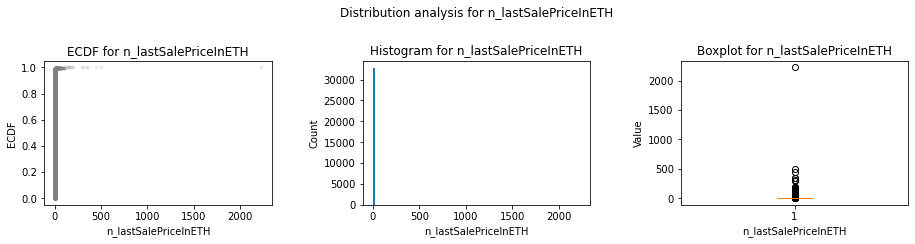

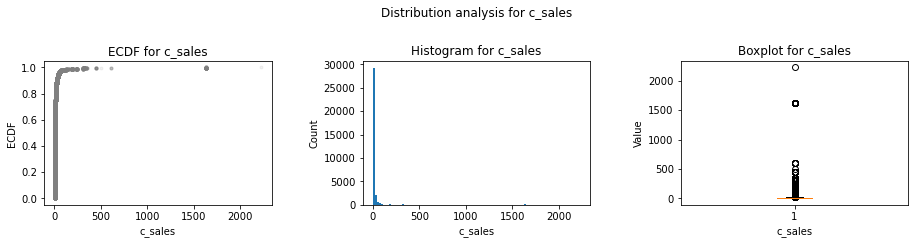

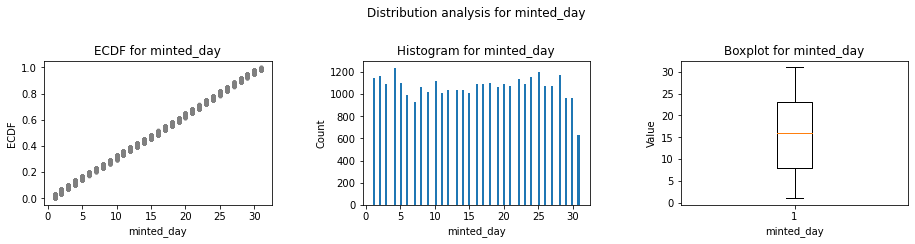

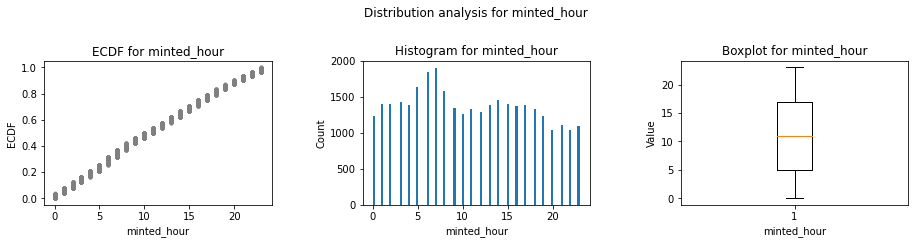

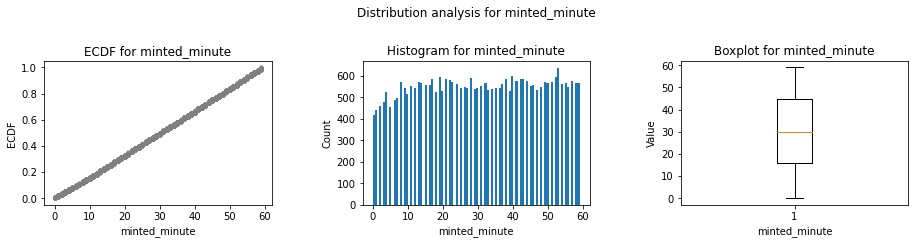

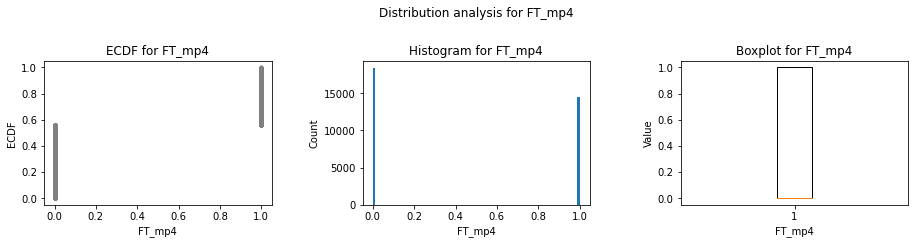

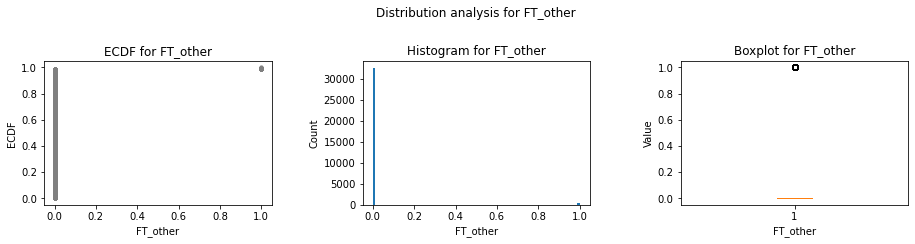

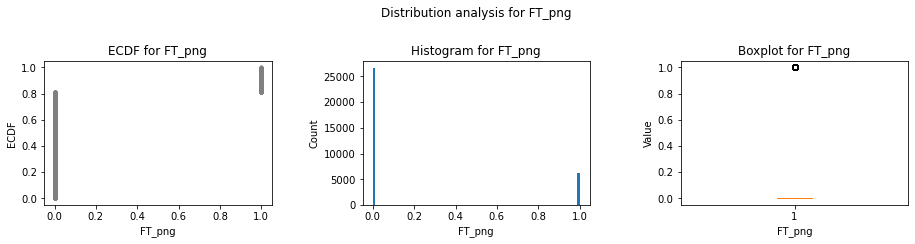

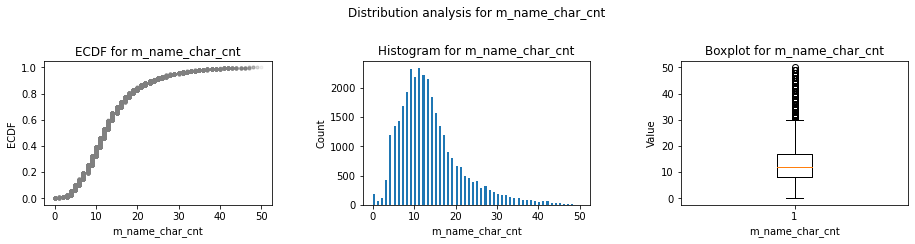

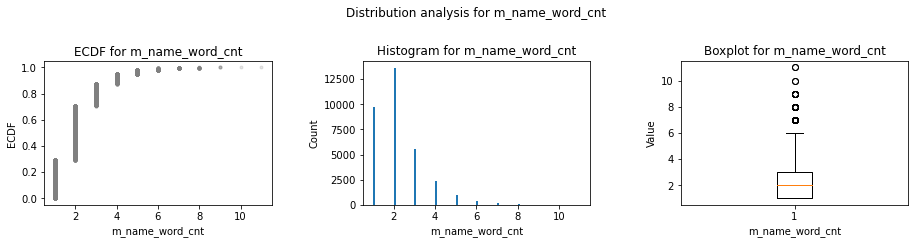

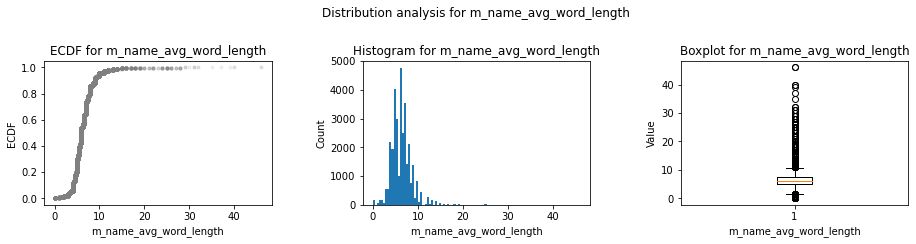

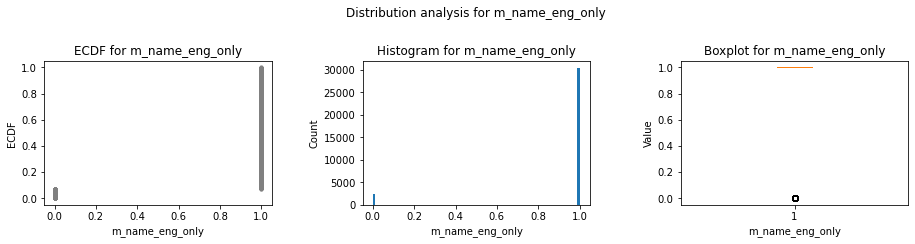

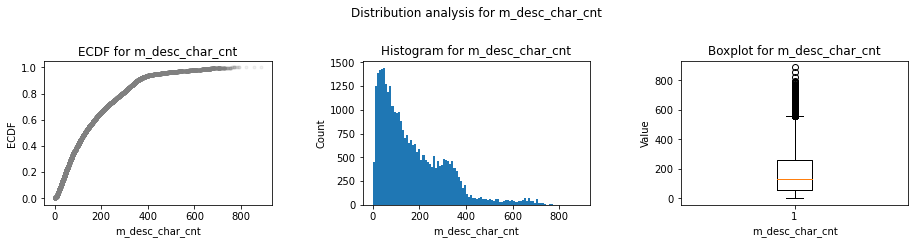

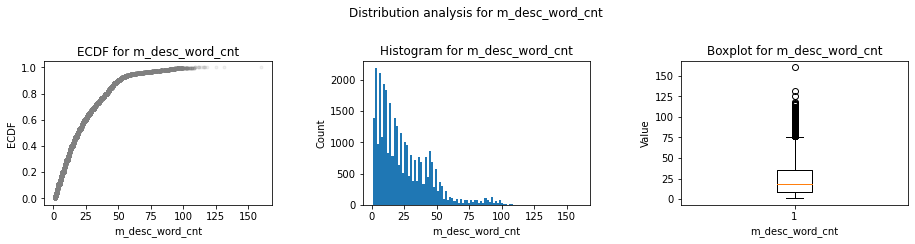

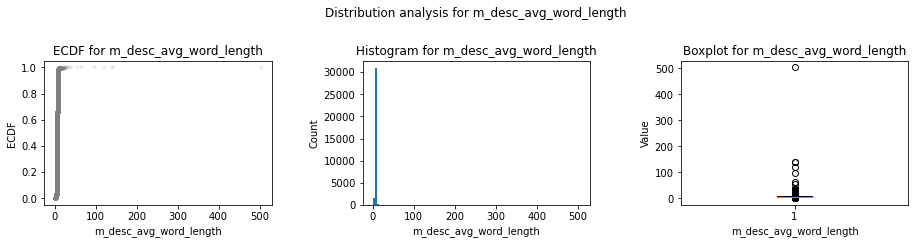

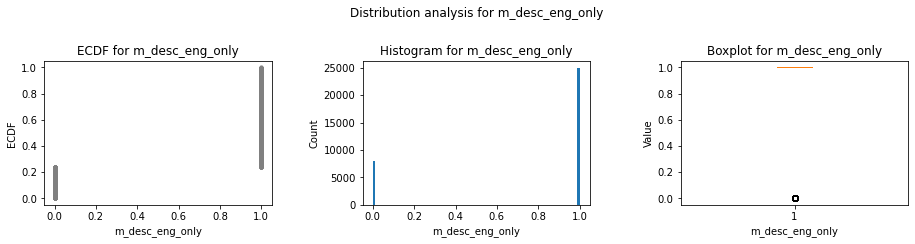

In [15]:
#select non text features 
dfn = df.select_dtypes(exclude = ['object'])

plot_columns = dfn.columns

n = len(plot_columns)
for i in range(n):
    x, y = ecdf(dfn[plot_columns[i]].values)
    
    fig,ax = plt.subplots(1,3,figsize = (15,5));
    
    # Plot for ECDF
    _ = ax[0].plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1);
    _ = ax[0].set_xlabel(plot_columns[i])
    _ = ax[0].set_ylabel("ECDF")
    _ = ax[0].set_title("ECDF for " + plot_columns[i])

    # Plot for Histogram
    _ = ax[1].hist(dfn[plot_columns[i]],bins = 100);
    _ = ax[1].set_xlabel(plot_columns[i])
    _ = ax[1].set_ylabel("Count")
    _ = ax[1].set_title("Histogram for " + plot_columns[i])

    # Plot for Boxplot
    _ = ax[2].boxplot(dfn[plot_columns[i]]);
    _ = ax[2].set_xlabel(plot_columns[i])
    _ = ax[2].set_ylabel("Value")
    _ = ax[2].set_title("Boxplot for " + plot_columns[i])

    _ = ax
    plt.subplots_adjust(left=0.1,
                        bottom=0.5, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
    plt.suptitle("Distribution analysis for " + plot_columns[i], y = 1.05)
    plt.show()

Dealing with outliers in 'n_lastSalePriceInETH' and 'm_desc_avg_word_length'

In [16]:
#dropping the outlier rows
n_base = len(df)
upper_lim_t = df.n_lastSalePriceInETH.quantile(0.95)
number_of_rows_t = len(df.n_lastSalePriceInETH[df.n_lastSalePriceInETH > upper_lim_t])
percent_of_data_t = len(df.n_lastSalePriceInETH[df.n_lastSalePriceInETH > upper_lim_t])/ n_base*100

print('The 95th percentile of data is',upper_lim_t,'ETH, with',number_of_rows_t,'rows greater than the 95th percentile, comprising',round(percent_of_data_t,2),'% of the dataset.')
df = df[df.n_lastSalePriceInETH <= upper_lim_t]

The 95th percentile of data is 3.0 ETH, with 1577 rows greater than the 95th percentile, comprising 4.79 % of the dataset.


In [17]:
rc = df.m_desc_clean[df.m_desc_avg_word_length>=20].count()
print("# of artworks with character per word more than 20: {} NFTs,comprising {} % of the dataset".format(rc,round(rc/n_base*100)))
df = df[df.m_desc_avg_word_length <= 20];

# of artworks with character per word more than 20: 24 NFTs,comprising 0 % of the dataset


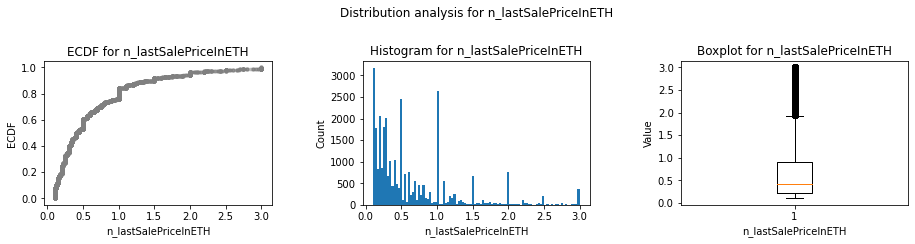

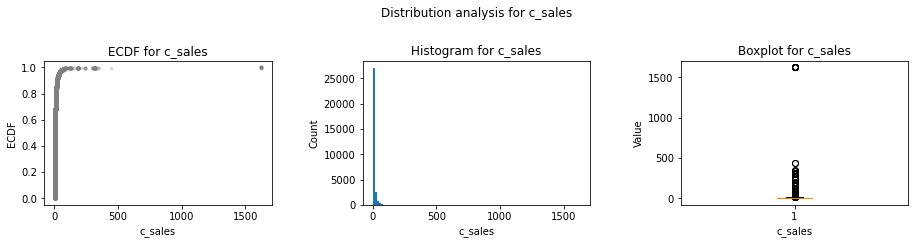

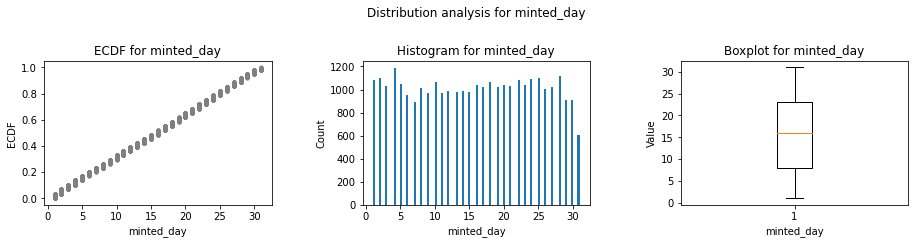

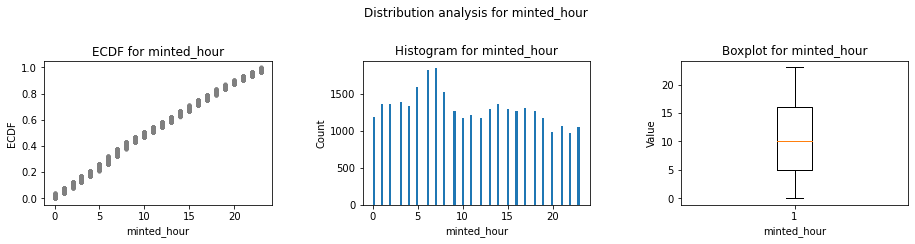

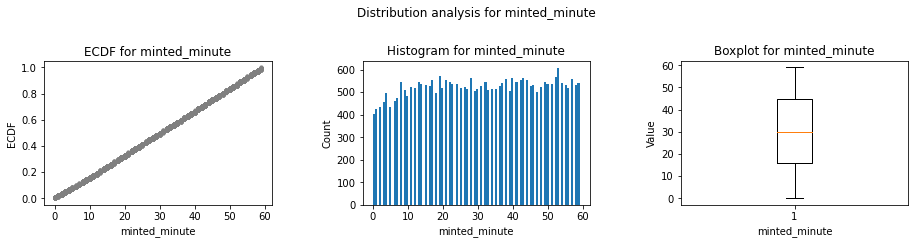

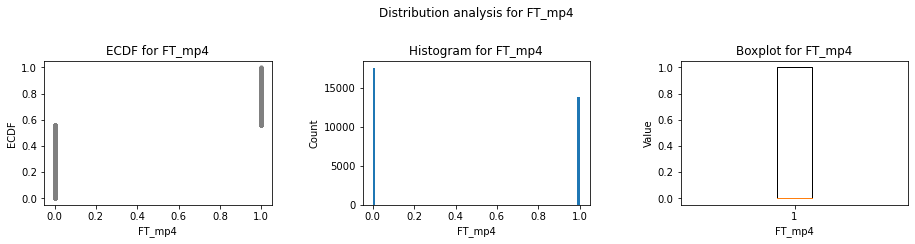

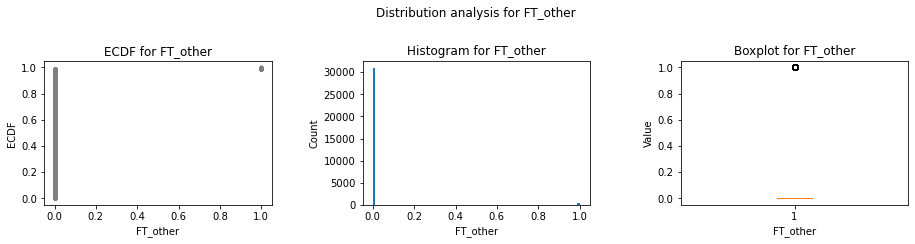

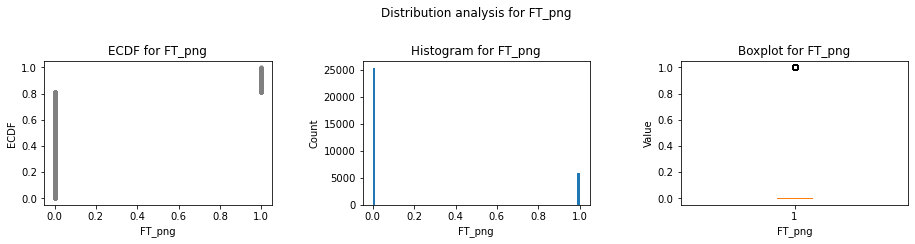

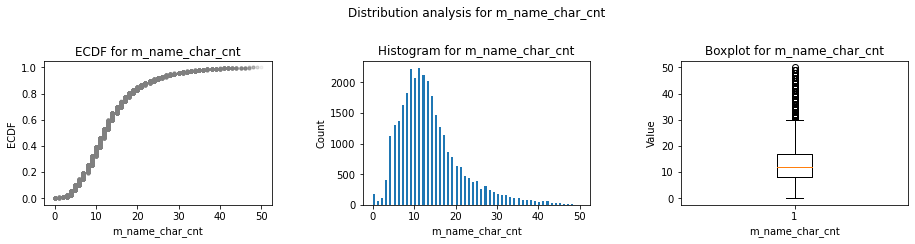

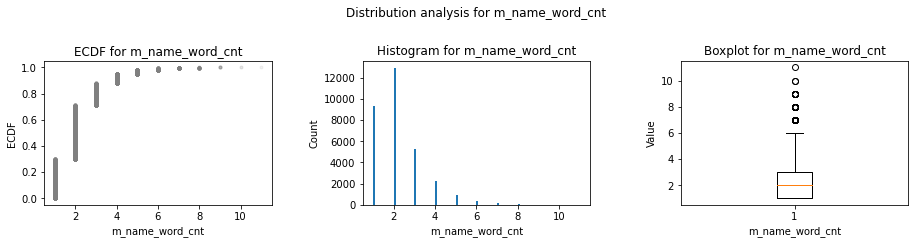

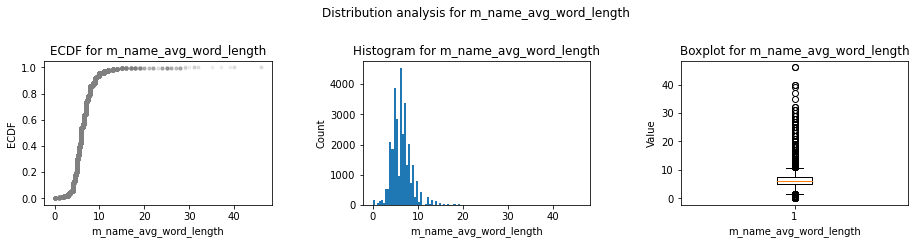

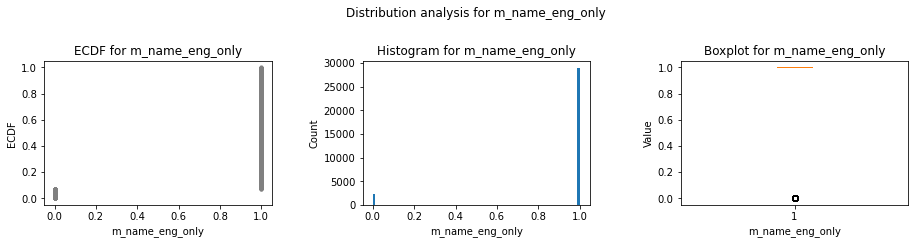

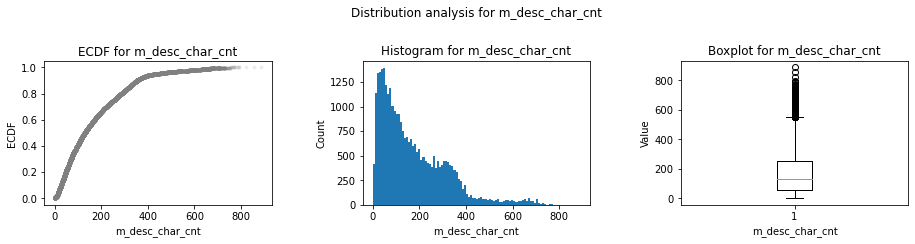

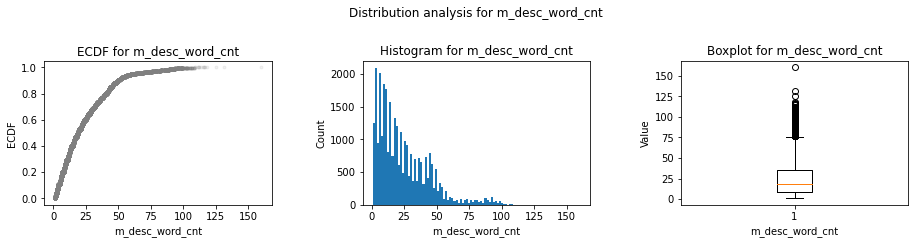

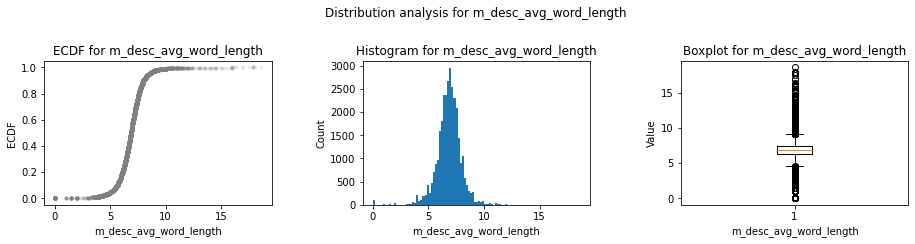

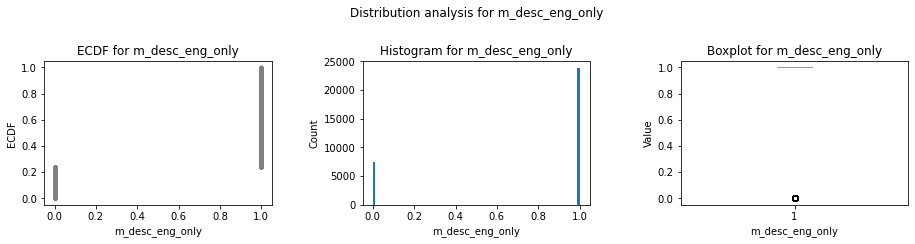

In [18]:
#select non text features 
dfn = df.select_dtypes(exclude = ['object'])

plot_columns = dfn.columns

n = len(plot_columns)
for i in range(n):
    x, y = ecdf(dfn[plot_columns[i]].values)
    
    fig,ax = plt.subplots(1,3,figsize = (15,5));
    
    # Plot for ECDF
    _ = ax[0].plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1);
    _ = ax[0].set_xlabel(plot_columns[i])
    _ = ax[0].set_ylabel("ECDF")
    _ = ax[0].set_title("ECDF for " + plot_columns[i])

    # Plot for Histogram
    _ = ax[1].hist(dfn[plot_columns[i]],bins = 100);
    _ = ax[1].set_xlabel(plot_columns[i])
    _ = ax[1].set_ylabel("Count")
    _ = ax[1].set_title("Histogram for " + plot_columns[i])

    # Plot for Boxplot
    _ = ax[2].boxplot(dfn[plot_columns[i]]);
    _ = ax[2].set_xlabel(plot_columns[i])
    _ = ax[2].set_ylabel("Value")
    _ = ax[2].set_title("Boxplot for " + plot_columns[i])

    _ = ax
    plt.subplots_adjust(left=0.1,
                        bottom=0.5, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
    plt.suptitle("Distribution analysis for " + plot_columns[i], y = 1.05)
    plt.show()

## 3.3 Exploring relationships between variables

Observing the pairplot for the target feature (first row), no obvious correlations were observed.
The correlation matrix reaffirms the pairplot and reveals only 3 features that have weak correlation with the target feature:
- 'c_sales', a measure of an artist's success based on total NFT sales, displayed a weak correlation of 0.18.
- - a possible explanation is that users value works based on how successful or famous an artist is.
- 'm_desc_char_cnt' and 'm_desc_word_cnt' displayed weak correlations of 0.12 and 0.11 respectively.
- - discounting weblinks, a higher description character and word count may suggest a more thoughtful craftwork.

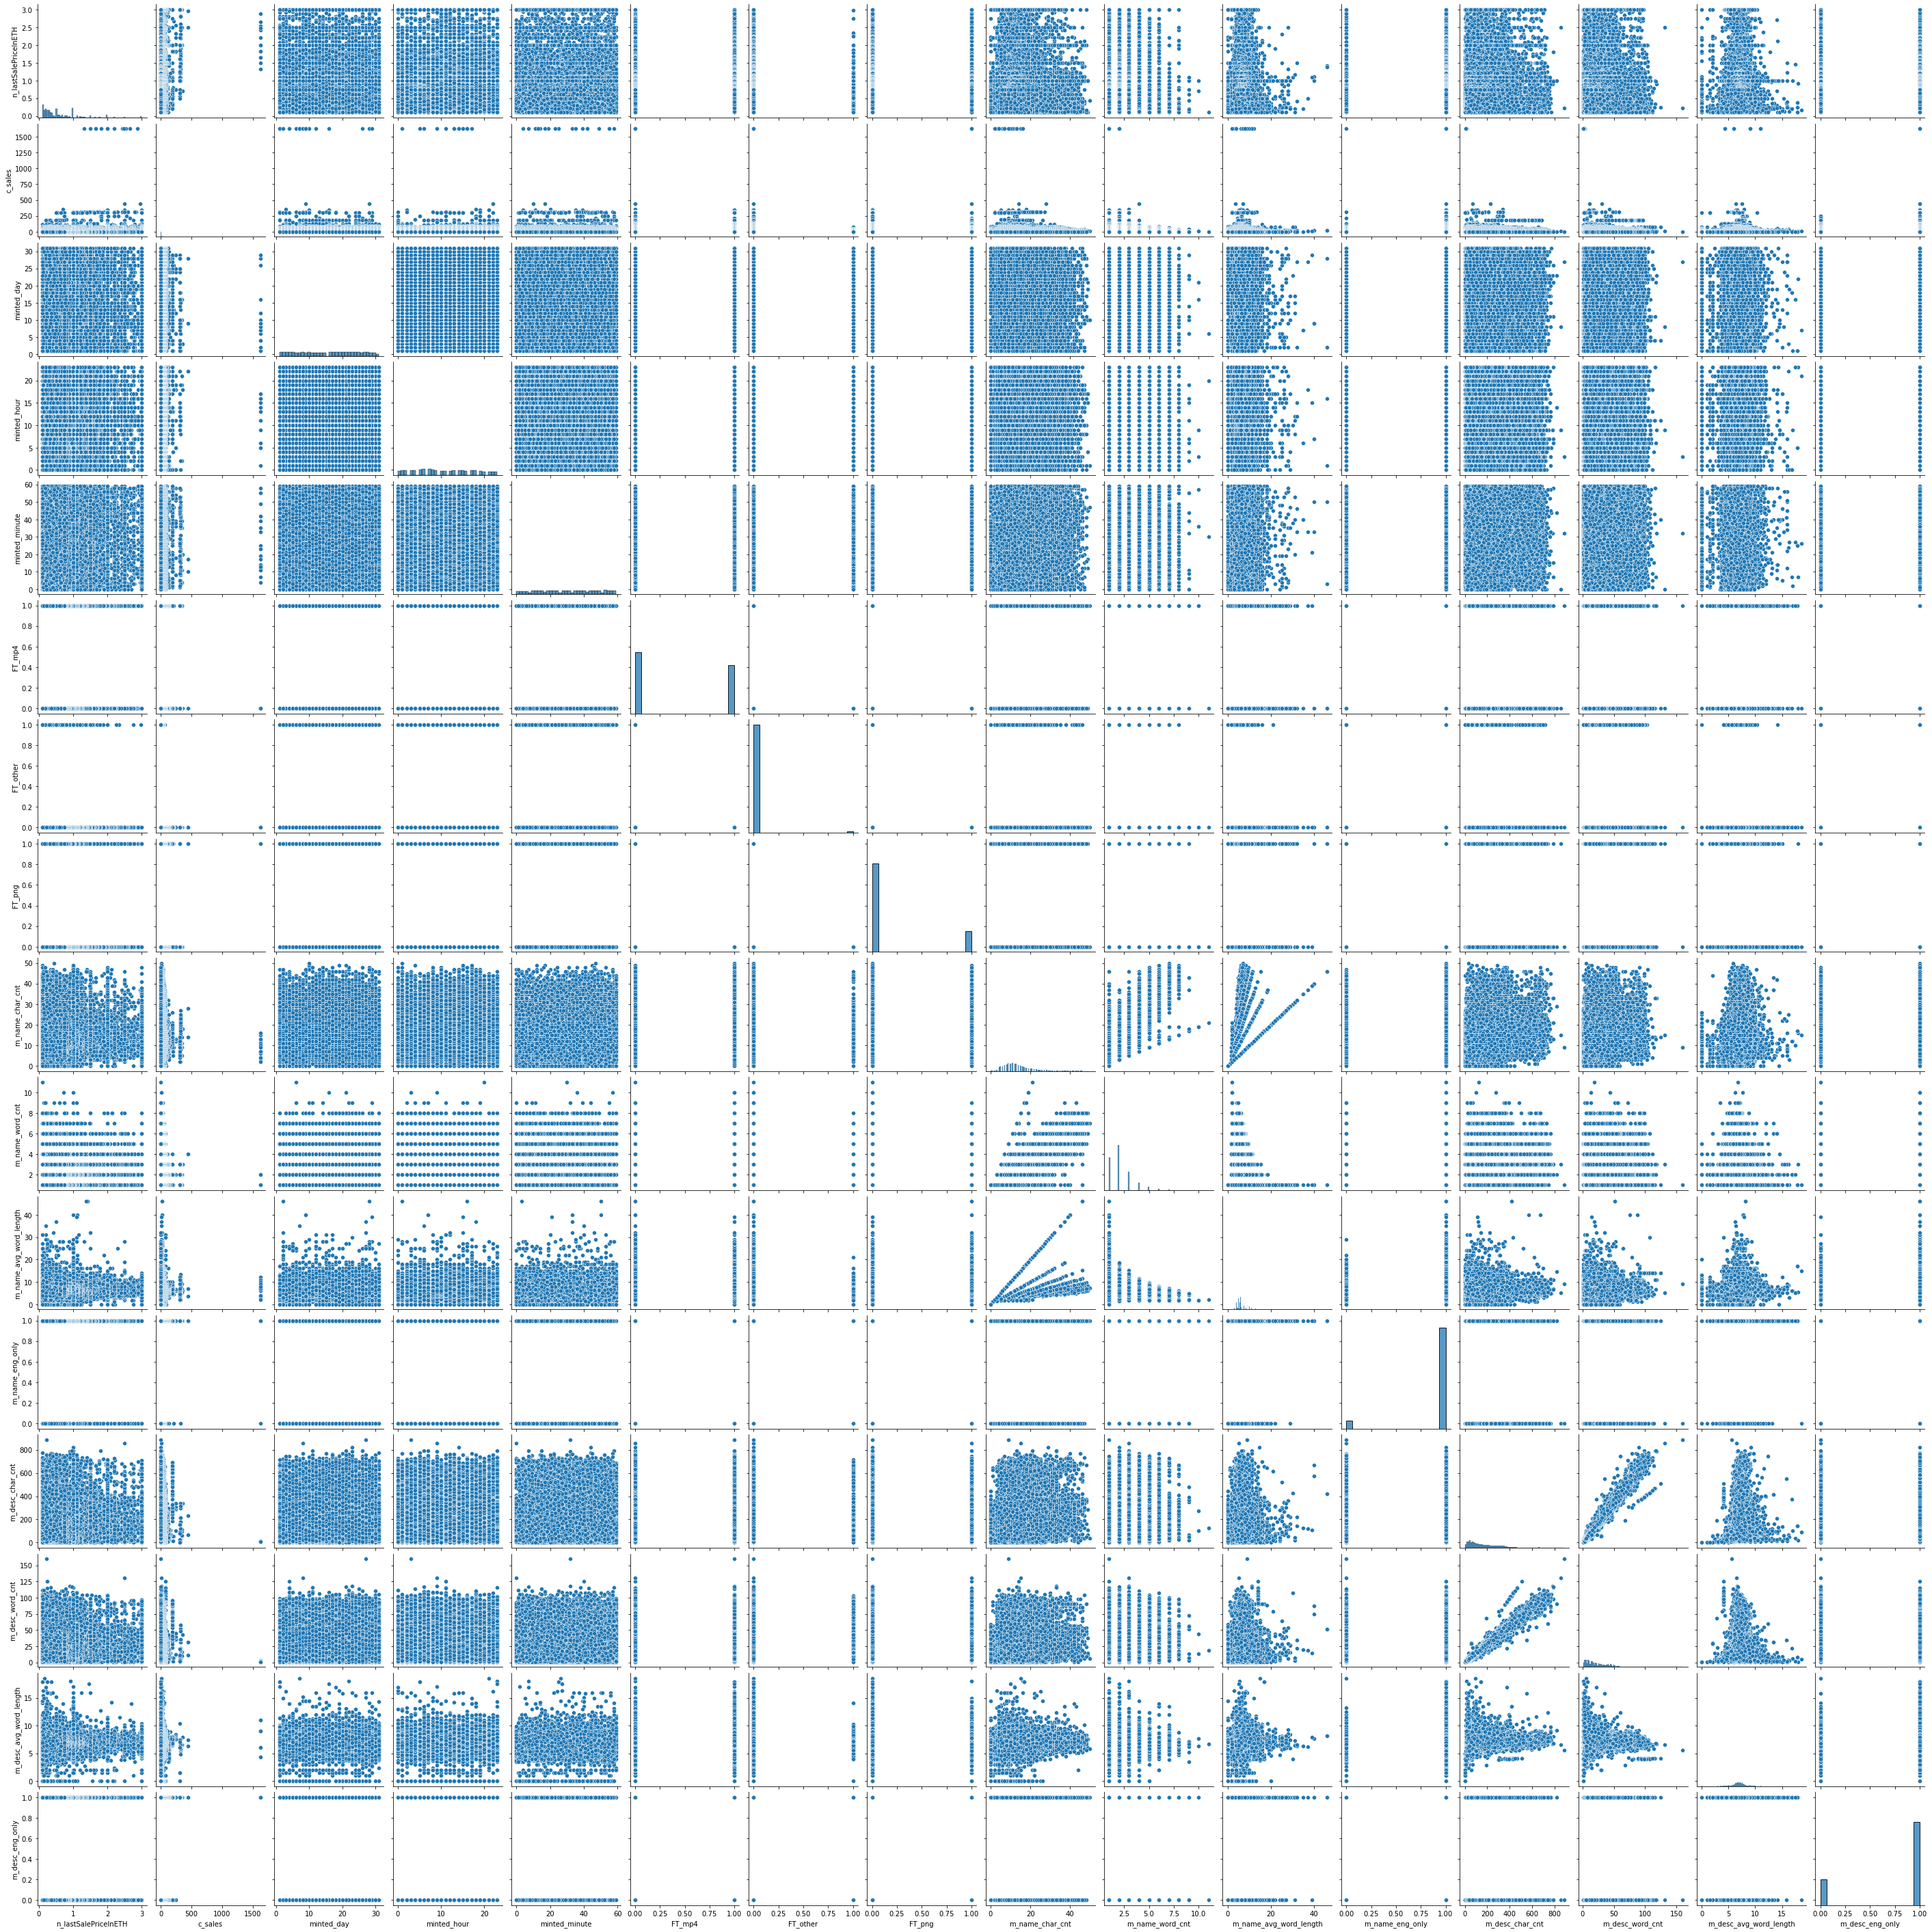

In [19]:
_ = sns.pairplot(dfn)

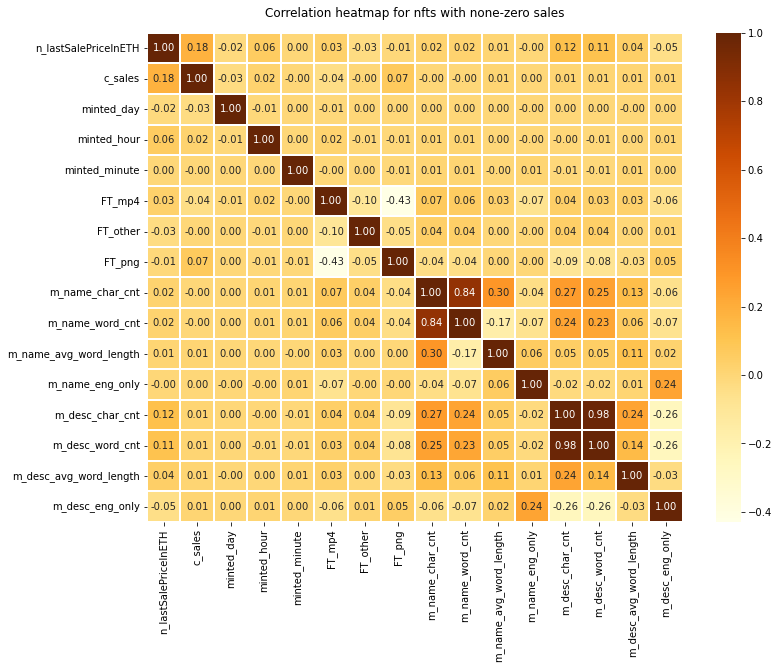

In [20]:
fig, ax = plt.subplots(figsize = (12,9))
_ = sns.heatmap(round(df.corr(),2), annot = True, ax = ax, cmap = "YlOrBr", fmt = ".2f",linewidths = 0.05)
_ = ax.set_title("Correlation heatmap for nfts with none-zero sales", y = 1.02)

TFIDF analysis of the name column revealed 'nft version' as an important bigram:
- this could be due to artists being popular on other social media platforms, and are creating NFT versions of previously published work to allow followers to gain a sense of ownership.

In [21]:
tv = TfidfVectorizer(max_features = 100, stop_words = 'english', ngram_range = (2,2))
tv_transformed = tv.fit_transform(df['m_name_clean'])
tv_df = pd.DataFrame(tv_transformed.toarray(),columns = tv.get_feature_names_out()).add_prefix('tv_name_')
print(tv_df.sum().sort_values(ascending = False).head(5))

tv_name_bastard countryside    32.0
tv_name_nft version            28.0
tv_name_end city               27.0
tv_name_fractal face           27.0
tv_name_dreamy trip            24.0
dtype: float64


Similar analysis performed on the description column revealed that most descriptions contained metadata information about the artwork, such as its medium or creation process.
- note that the top 20 bigrams show no descriptions of the contents of the artwork.

In [22]:
tv1 = TfidfVectorizer(max_features = 100, stop_words = 'english', ngram_range = (2,2))
tv1_transformed = tv1.fit_transform(df['m_desc_clean'])
tv1_df = pd.DataFrame(tv1_transformed.toarray(),columns = tv1.get_feature_names_out()).add_prefix('tv1_desc_')
print(tv1_df.sum().sort_values(ascending = False).head(20))

tv1_desc_digital painting     431.135739
tv1_desc_300 dpi              368.469008
tv1_desc_original artwork     259.325463
tv1_desc_digital art          251.333898
tv1_desc_edition 11           243.210130
tv1_desc_year 2021            225.017190
tv1_desc_generative art       215.892806
tv1_desc_collector receive    206.081774
tv1_desc_cinema 4d            203.695242
tv1_desc_30 fps               189.520450
tv1_desc_11 edition           186.155987
tv1_desc_mixed media          173.955682
tv1_desc_created using        171.606137
tv1_desc_adobe photoshop      161.489178
tv1_desc_fine art             157.013129
tv1_desc_high resolution      155.208257
tv1_desc_1080 1080            149.907294
tv1_desc_sound design         149.648929
tv1_desc_single edition       143.448654
tv1_desc_seamless loop        142.497429
dtype: float64
